# K-Means Clustering



`Step-1`: Select the number of clusters, say 2.  
`Step-2`: Now, Choose centroid for each cluster.The position of `centroid` is choosen randomly.

`Step-3`:Now, K-means will assign each data point to its closest centroid.

`Step-4`:Now, update the `cordinates` of the centroid (x-cordinate and y-cordinate) by taking the average of each datapoint present in the cluster.

`Step-5`: Repeat `Step 3` and `Step 4`

The repetation goes on until there is no change between the `cordinates` of the centroid.

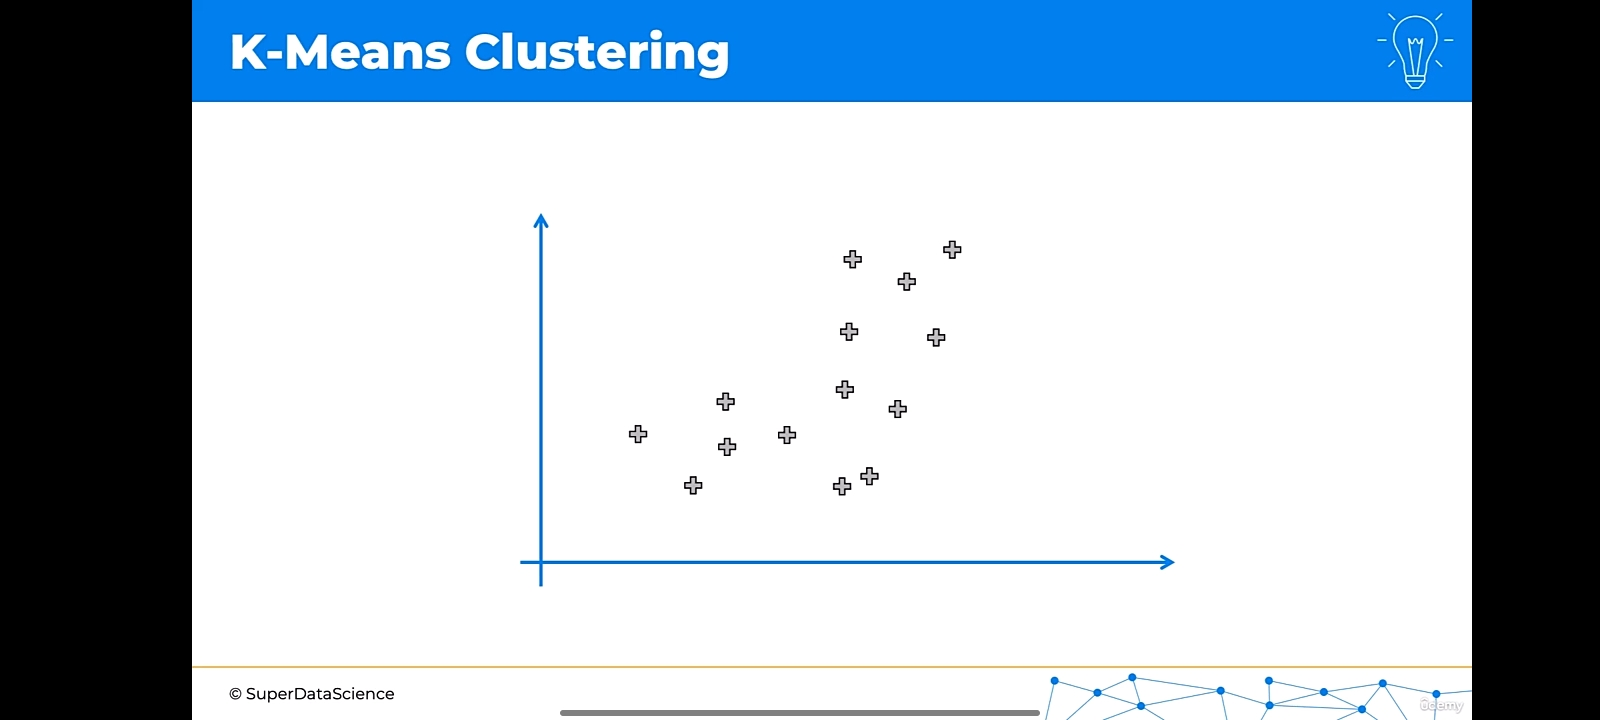

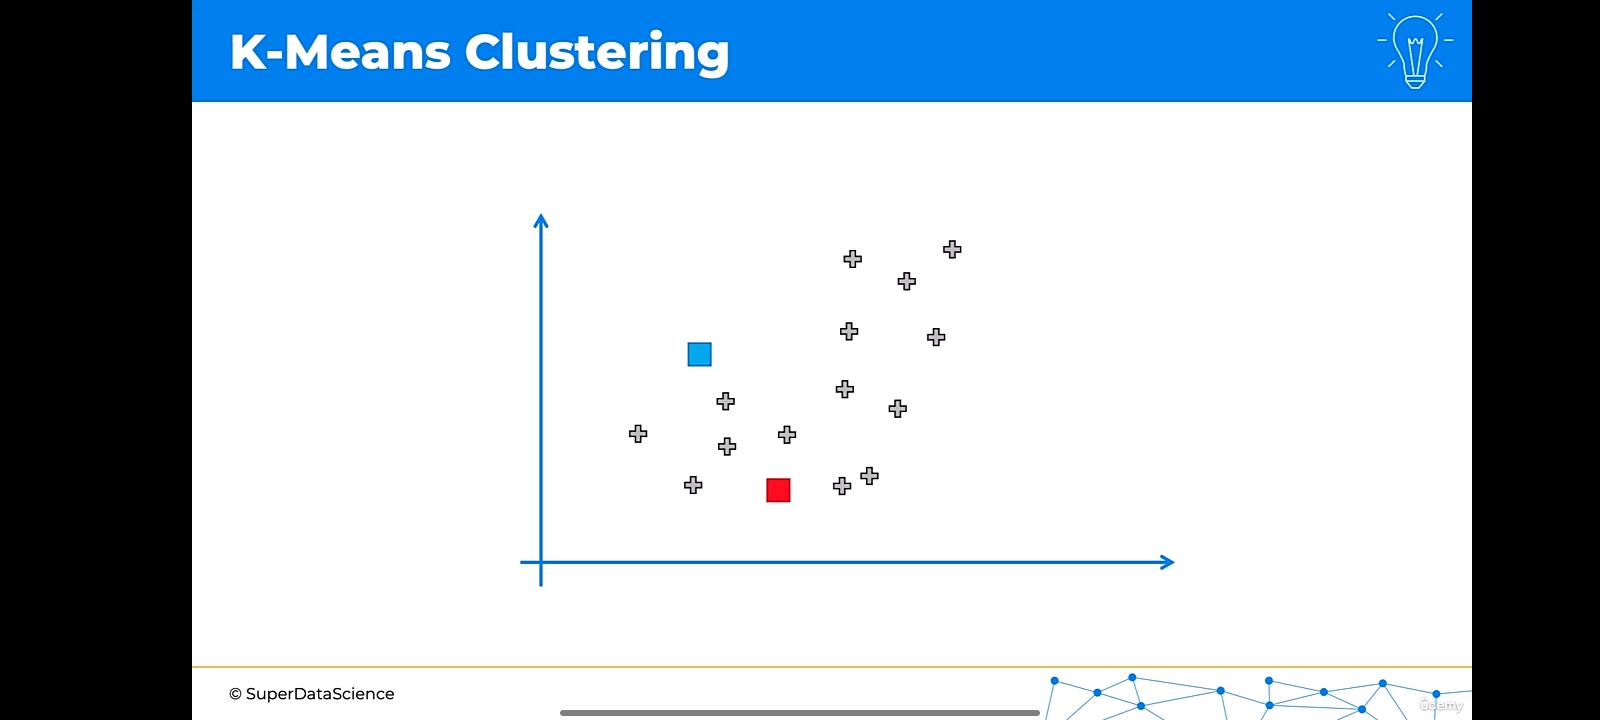

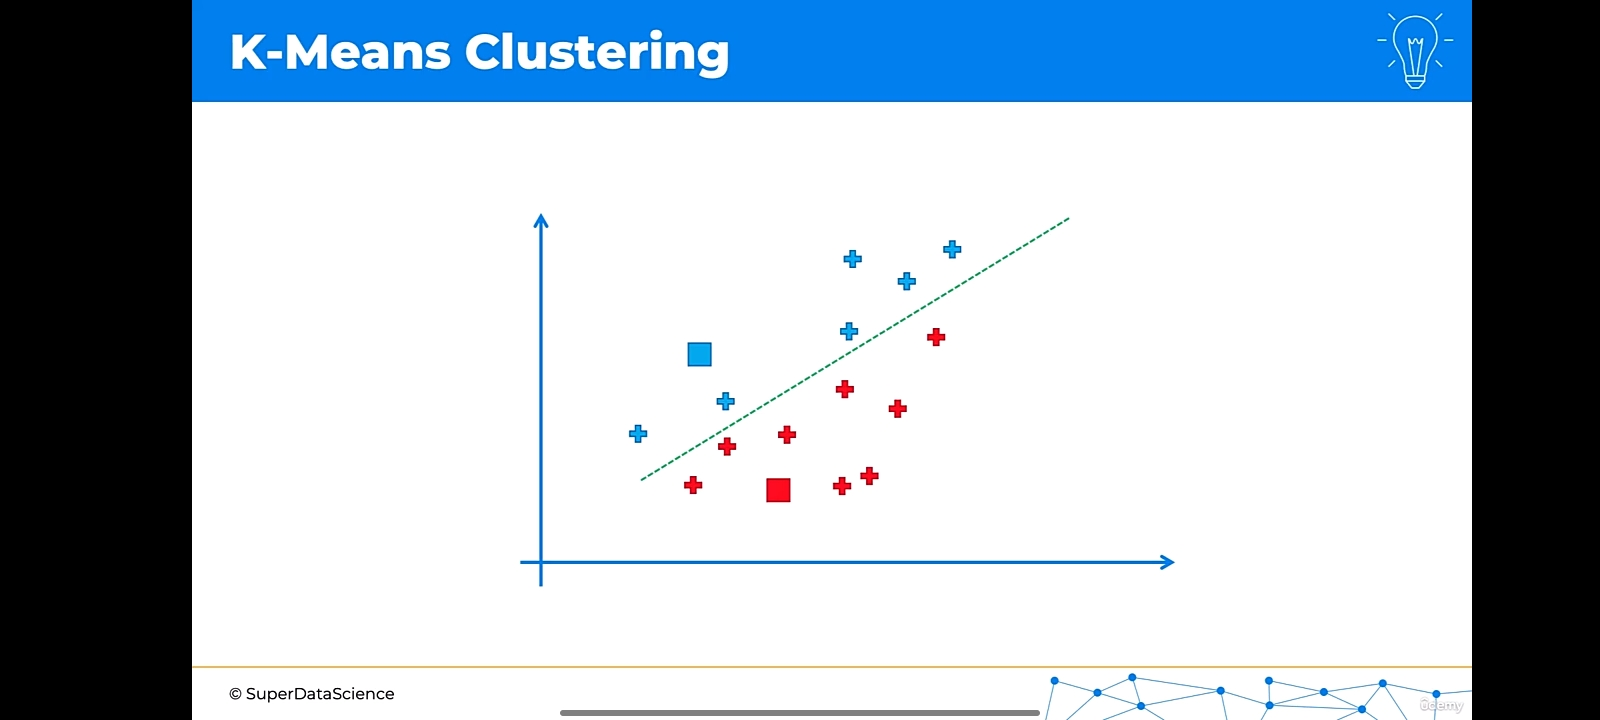

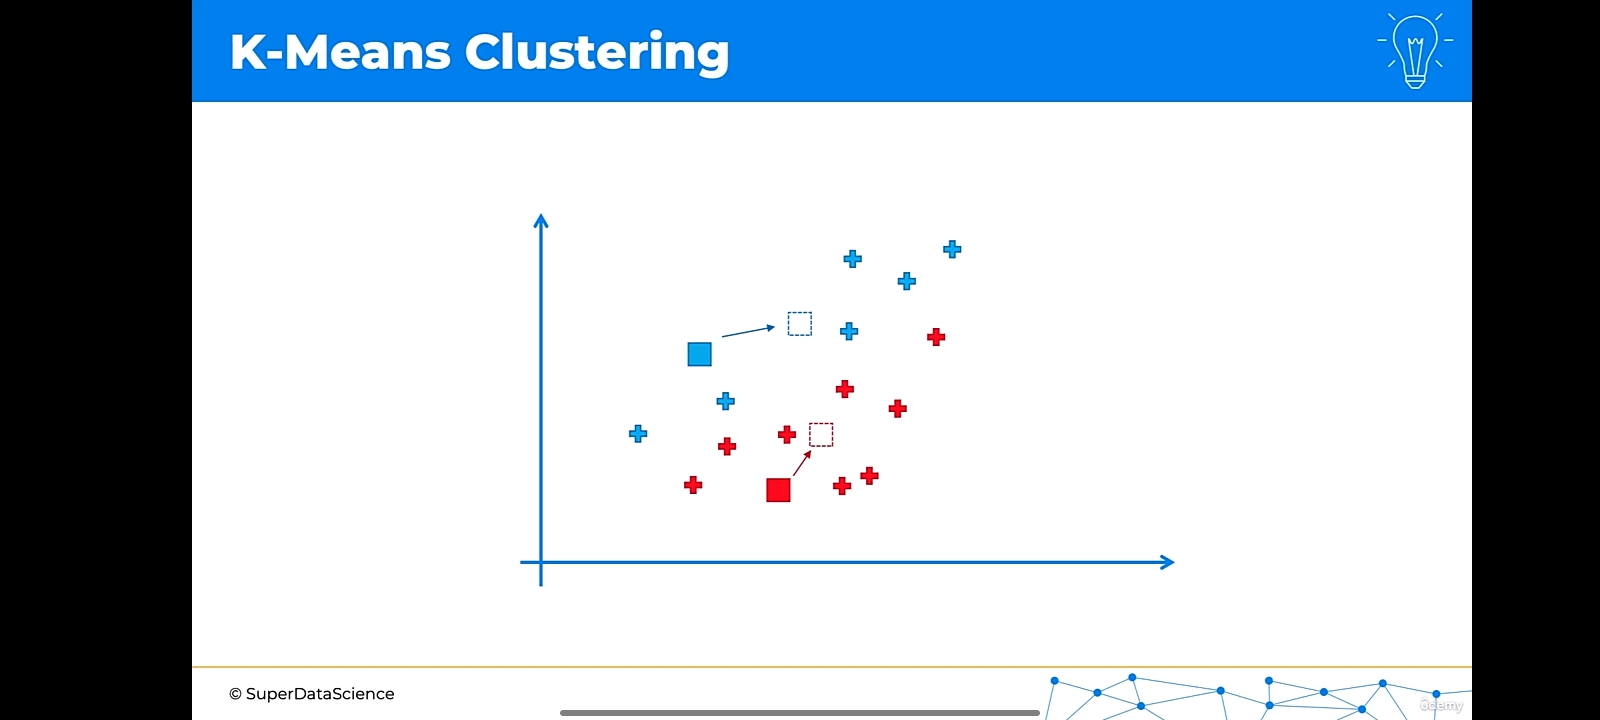

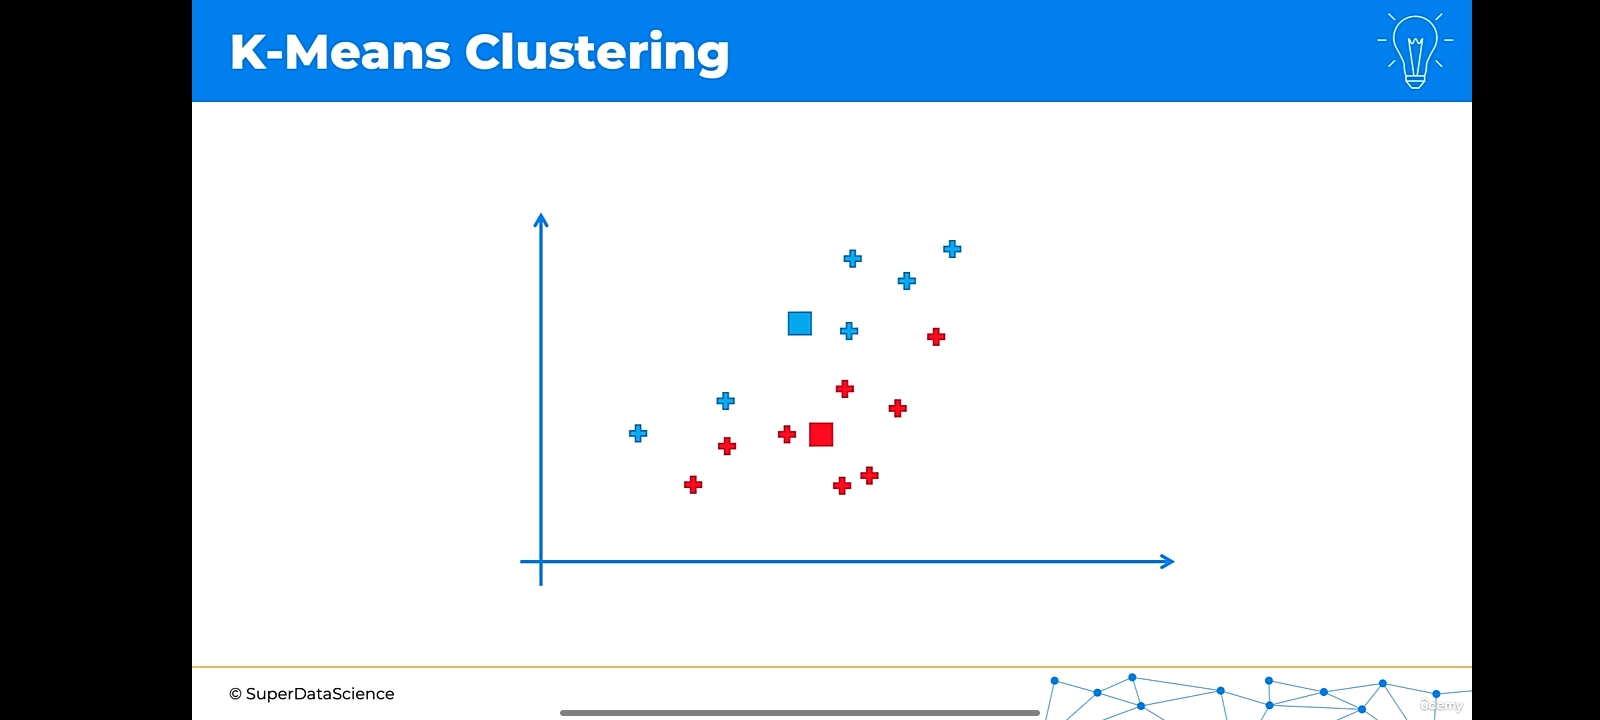

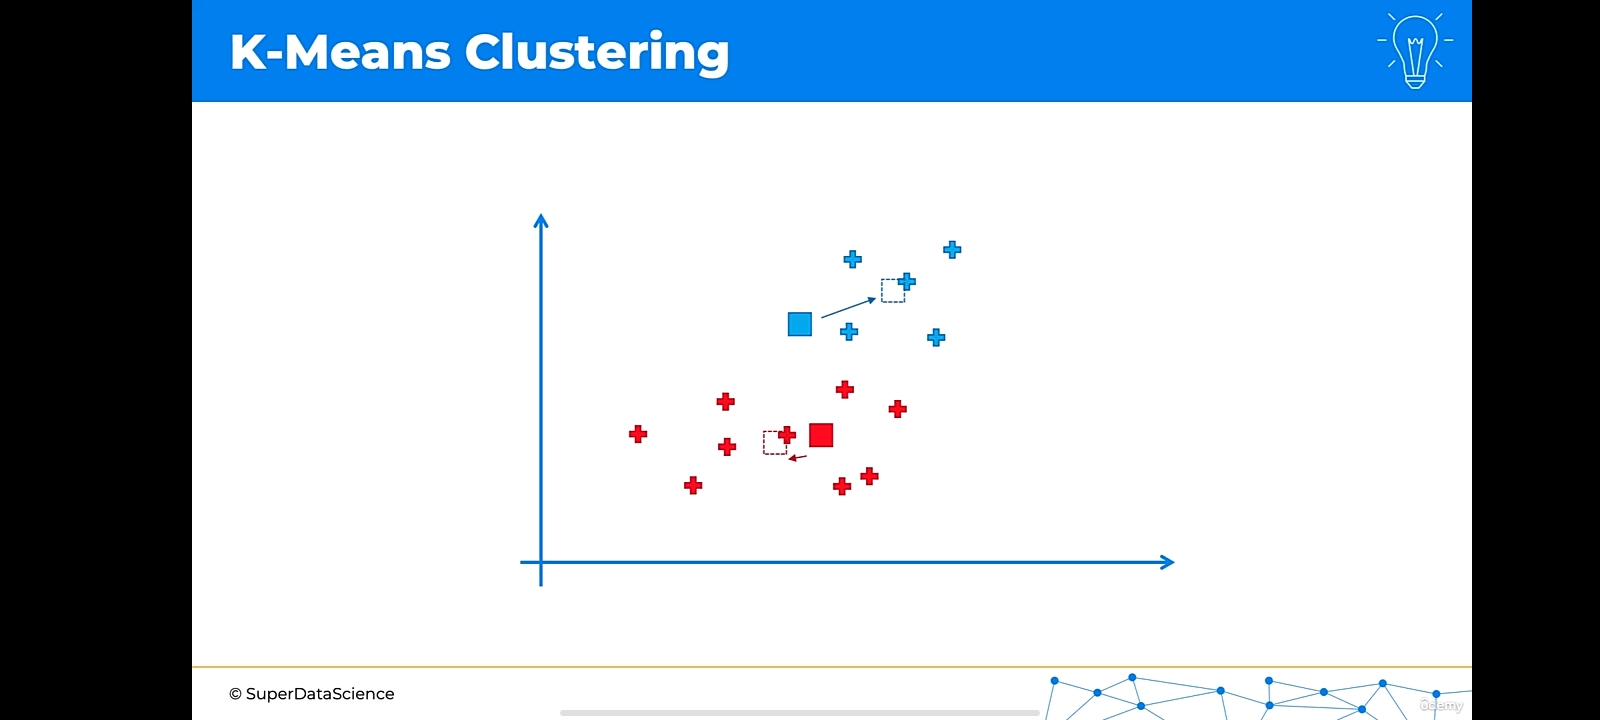

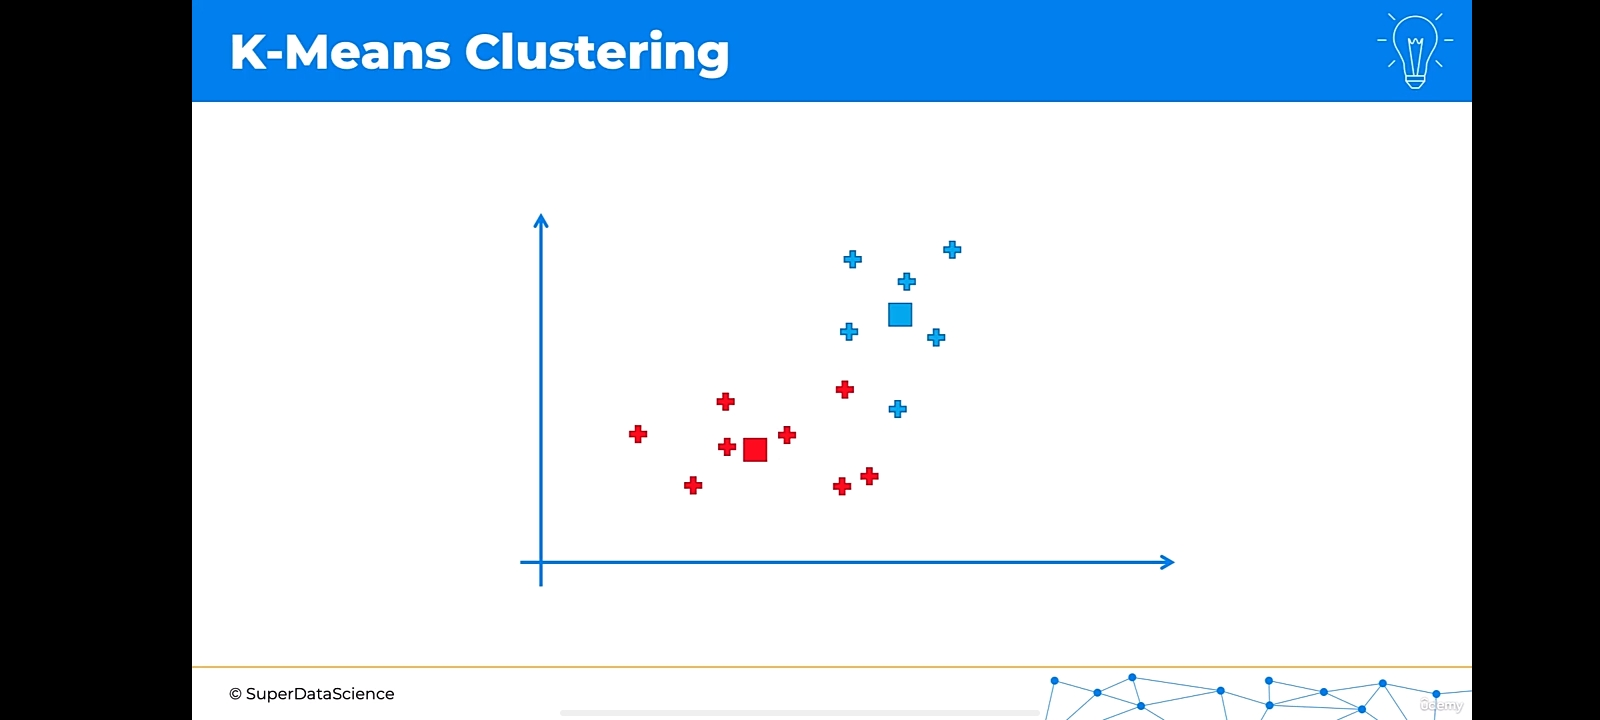

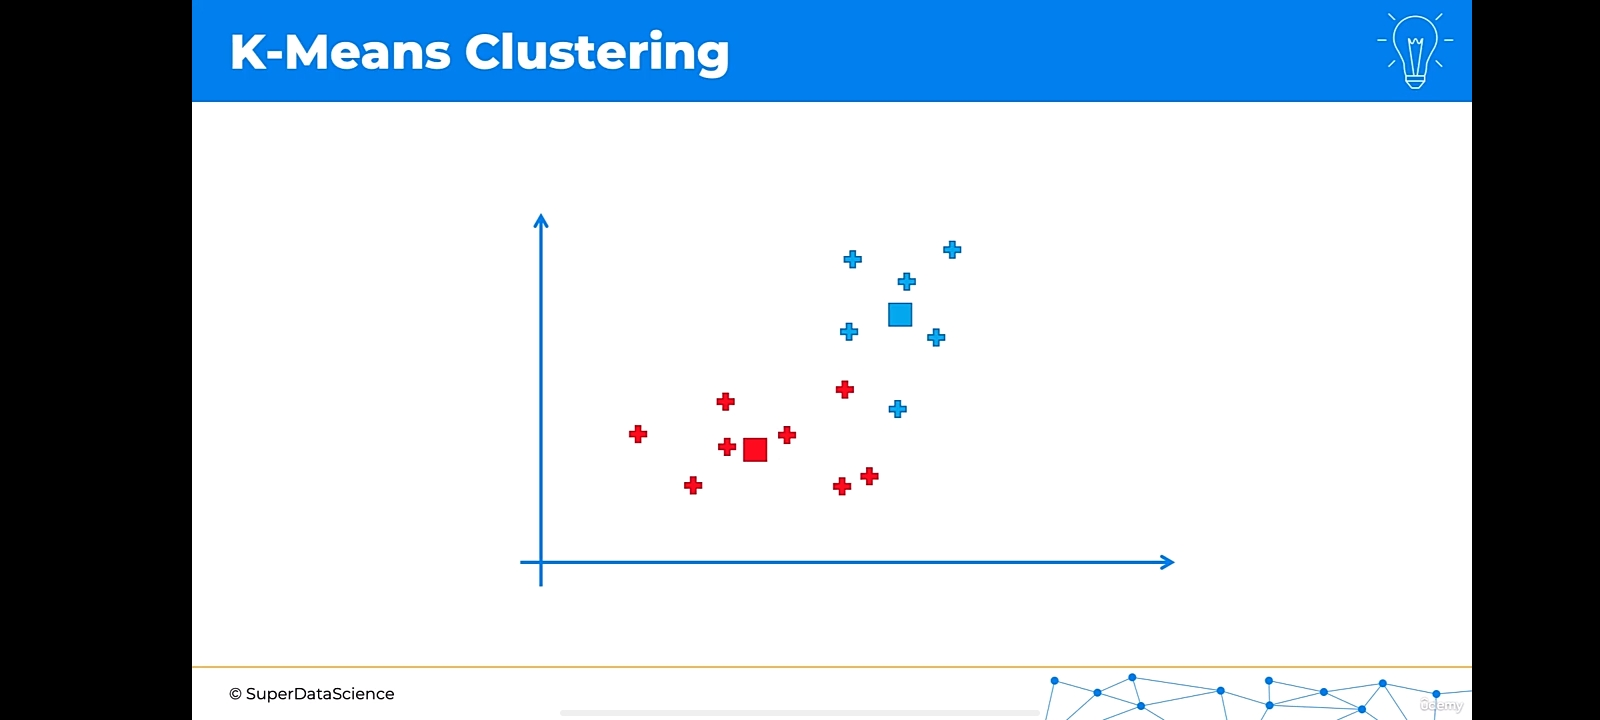

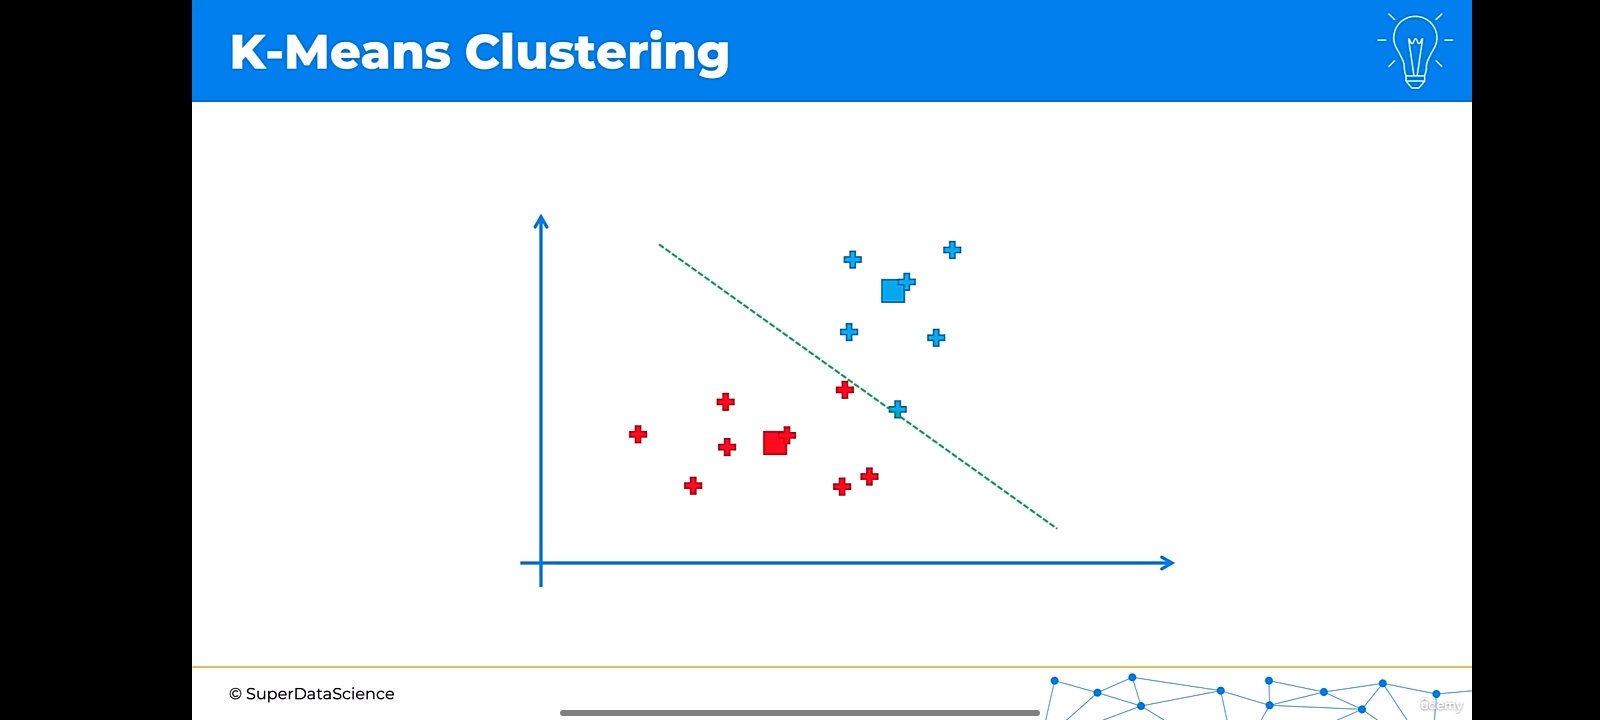

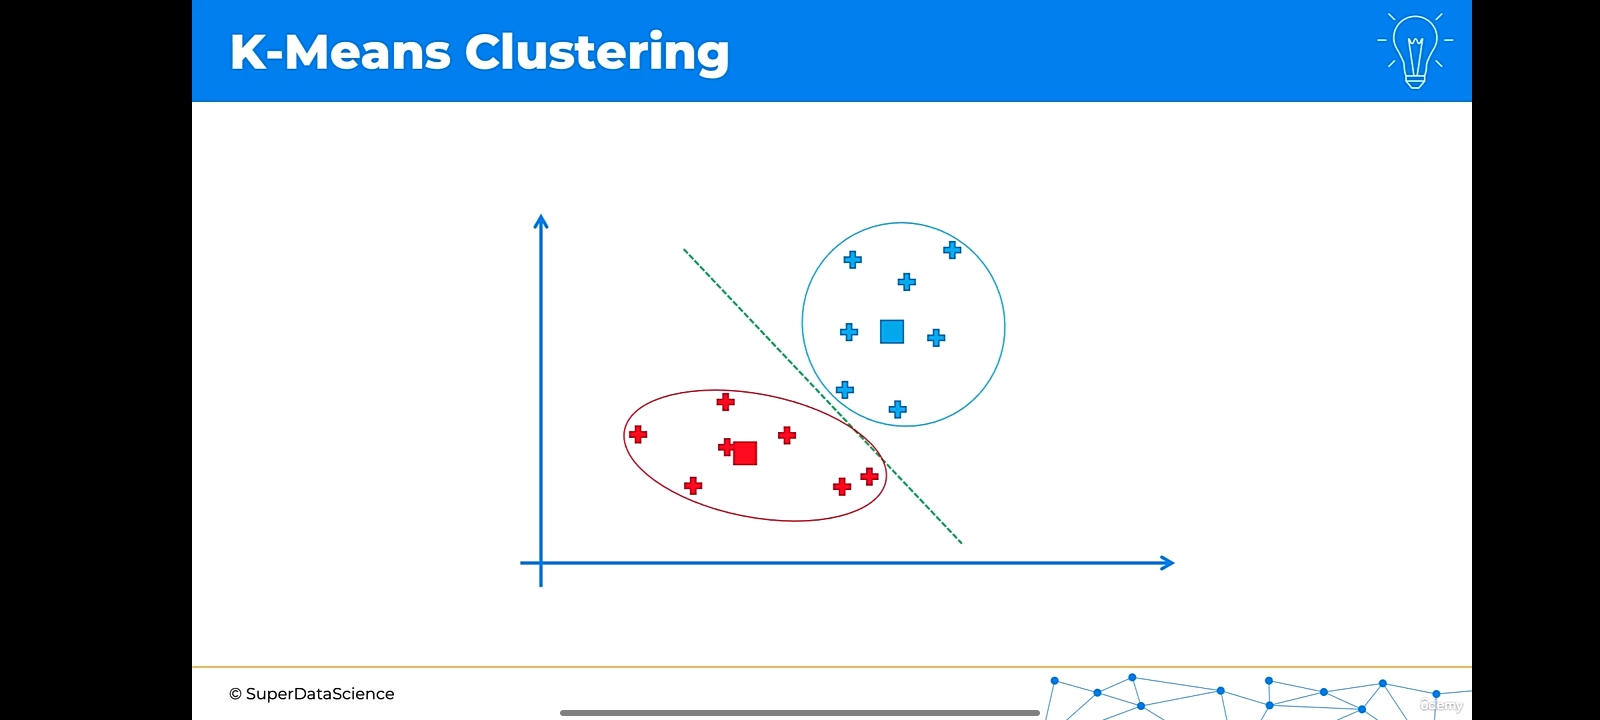

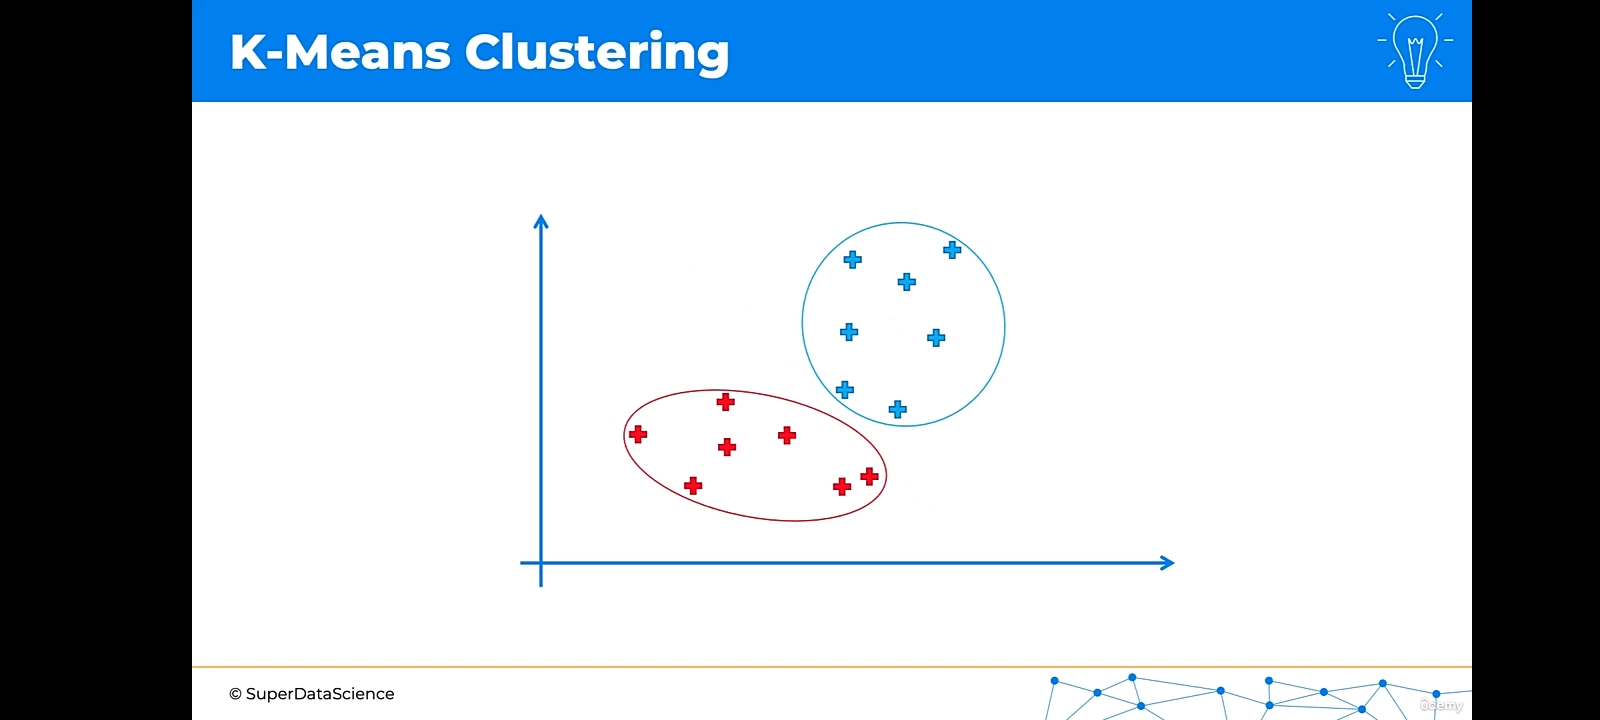

At the end, we'll get the final clusters

## Deciding the Optimal Number of `Clusters (K)` through Elbow Method

We iterate over a range of k values, typically from 1 to n (where n is a hyper-parameter you choose).

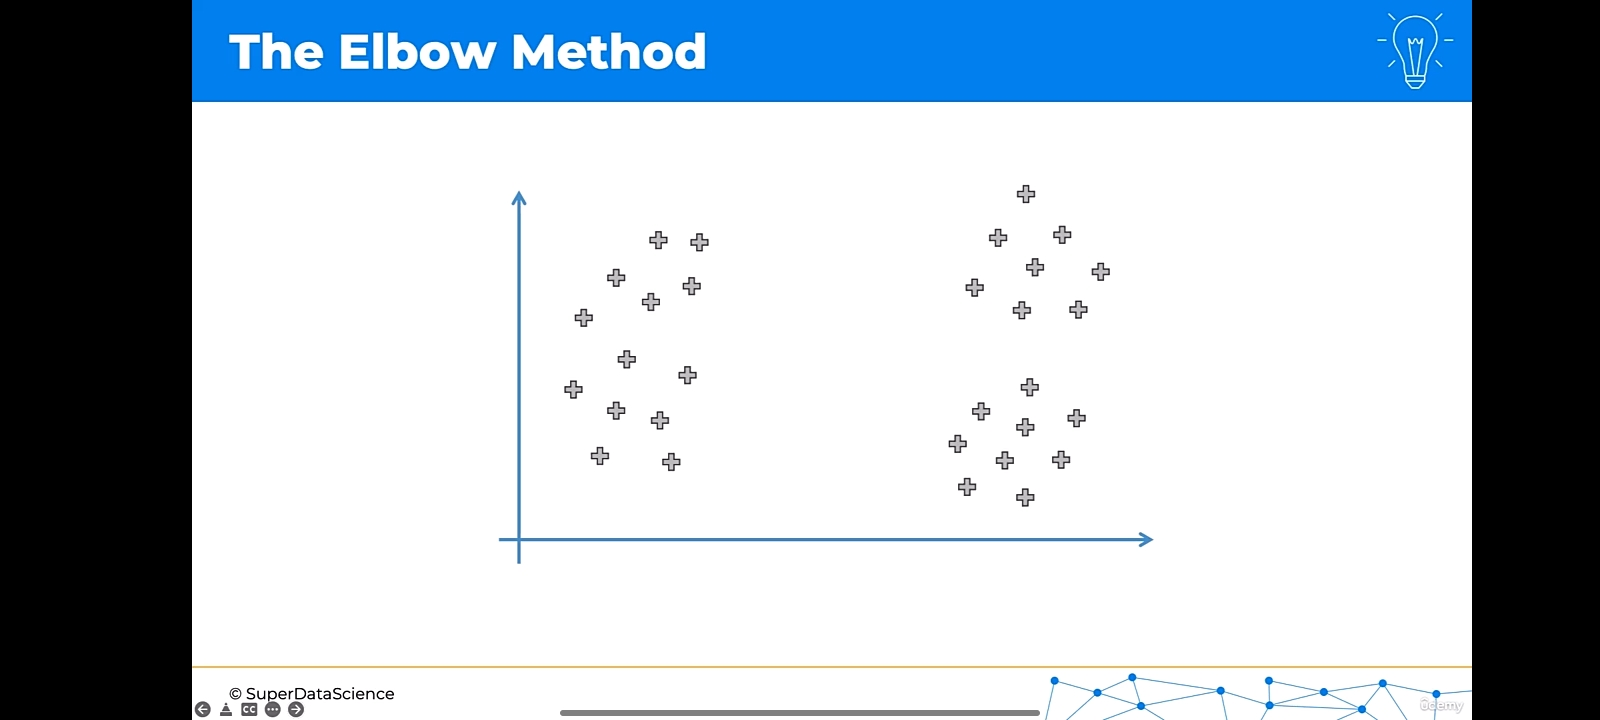

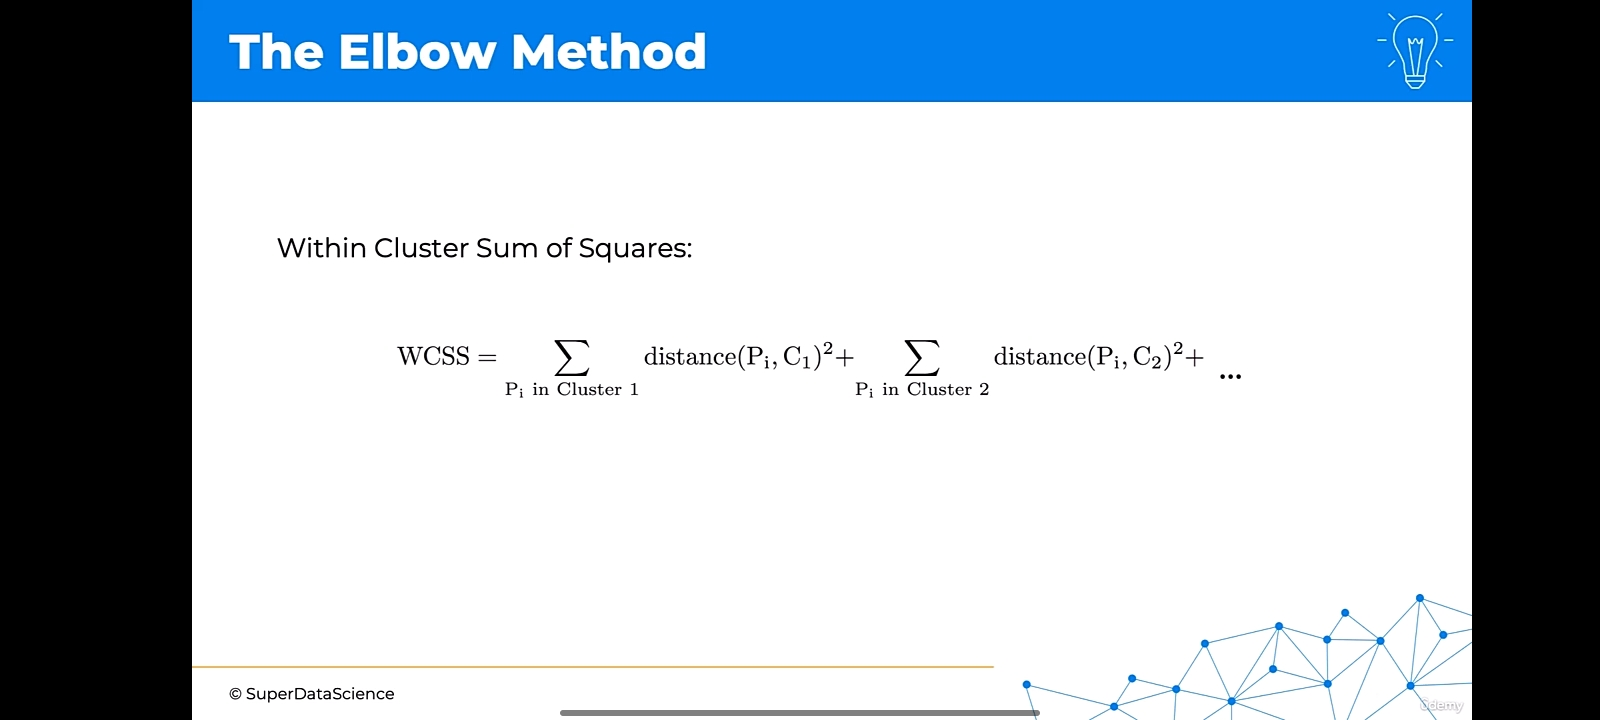

For each k, we calculate the Within-Cluster Sum of Squares (WCSS).

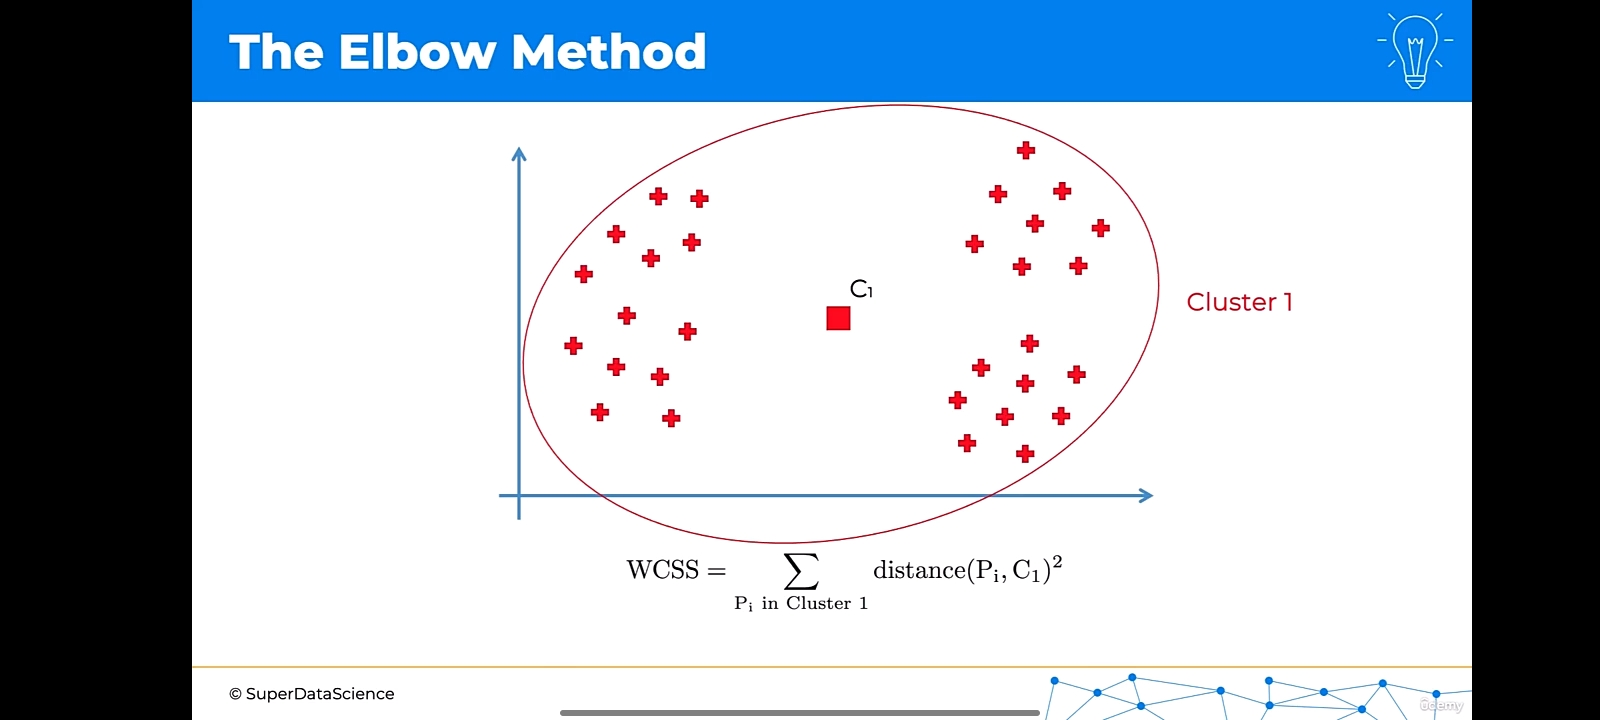

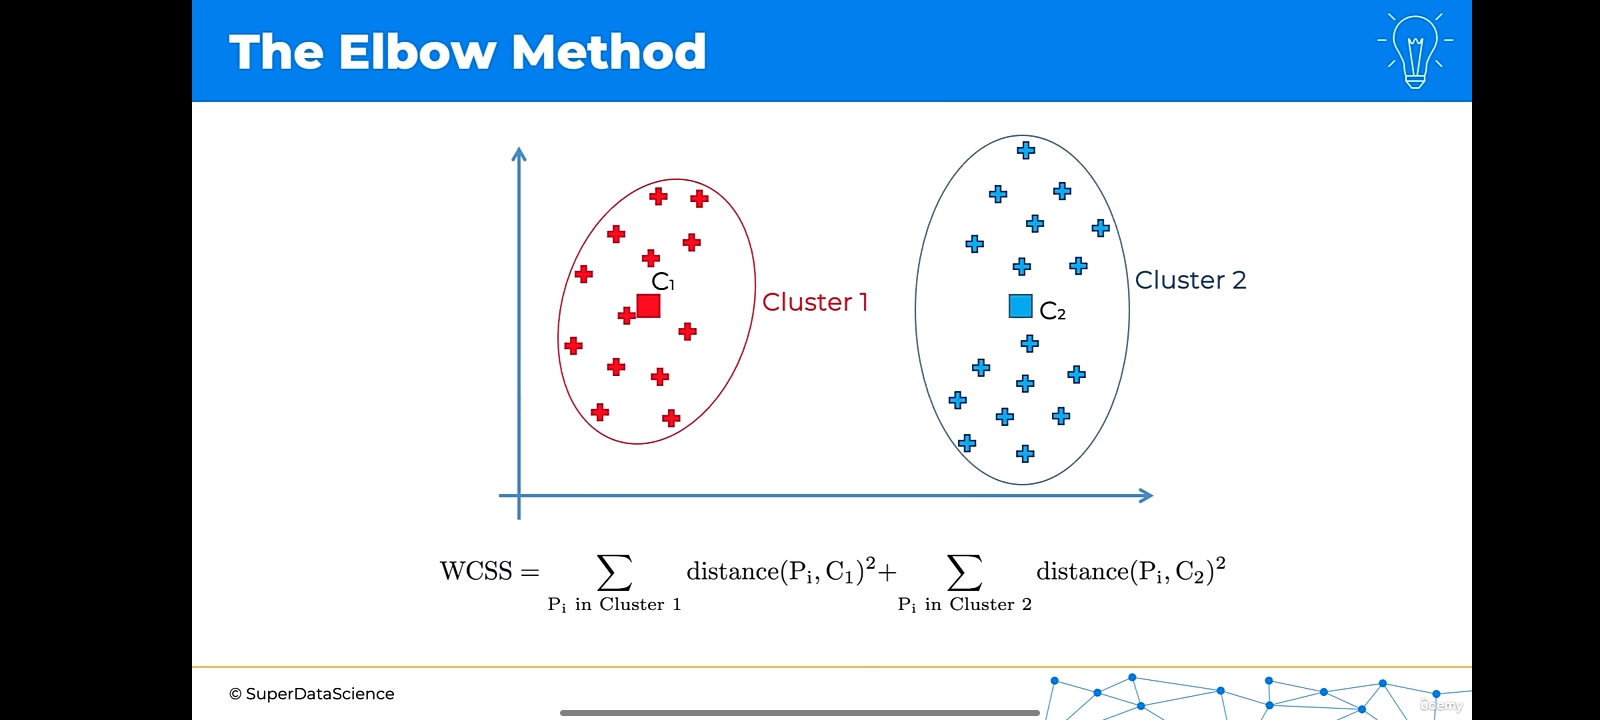

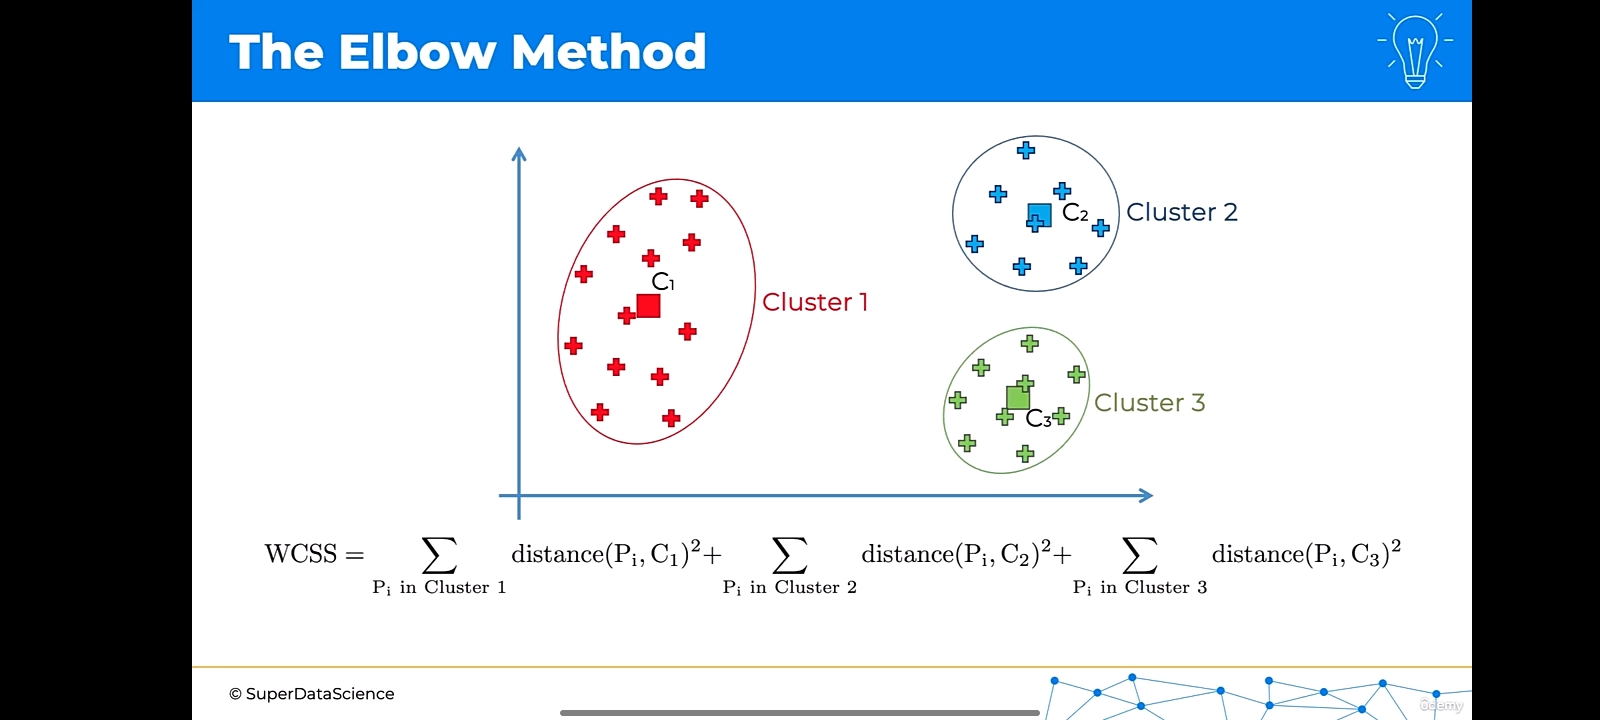

The value of `wcss` keeps on decreasing as we increases the number of `k`.

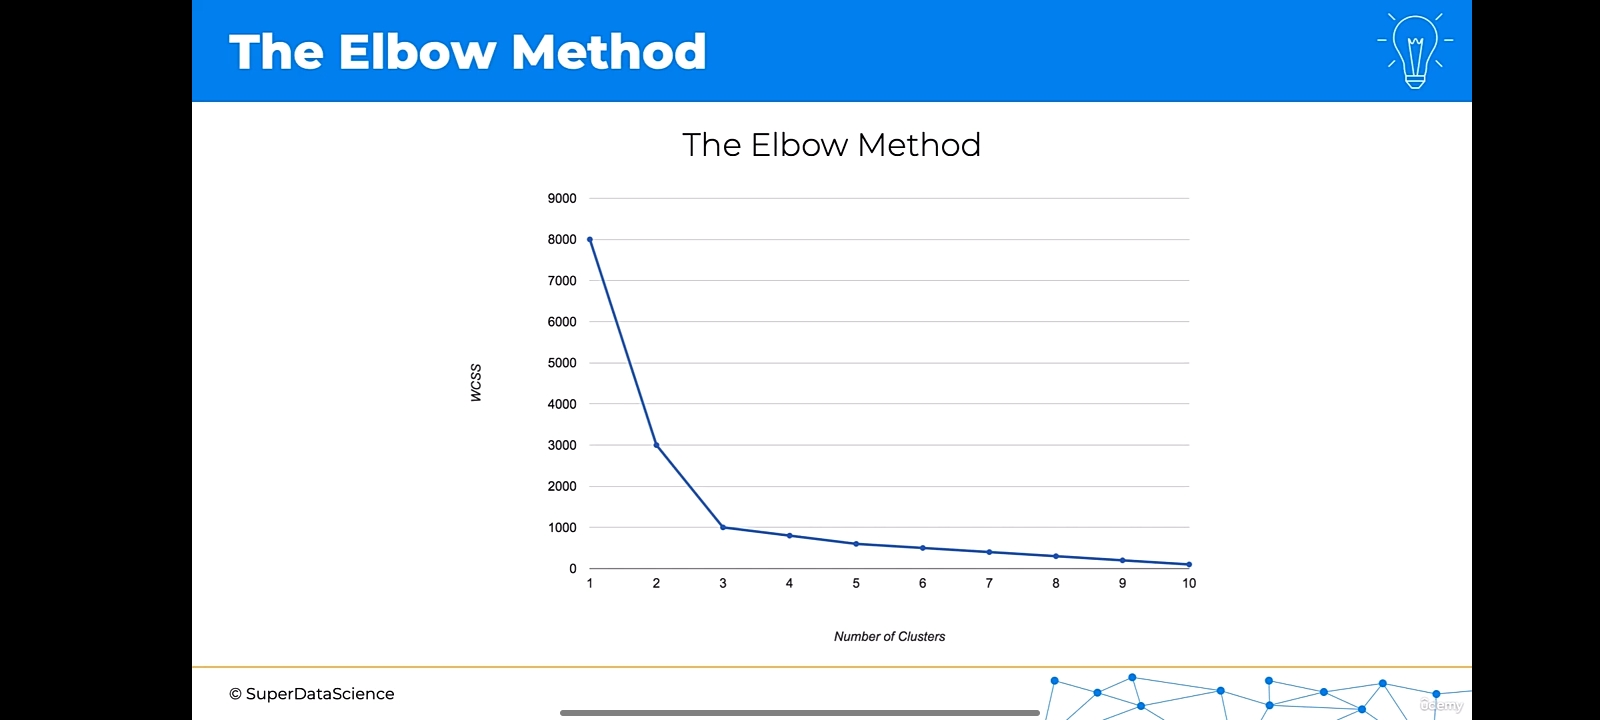

the number from which `WCSS` stops dropping as rapidly, that number considered as optimal.

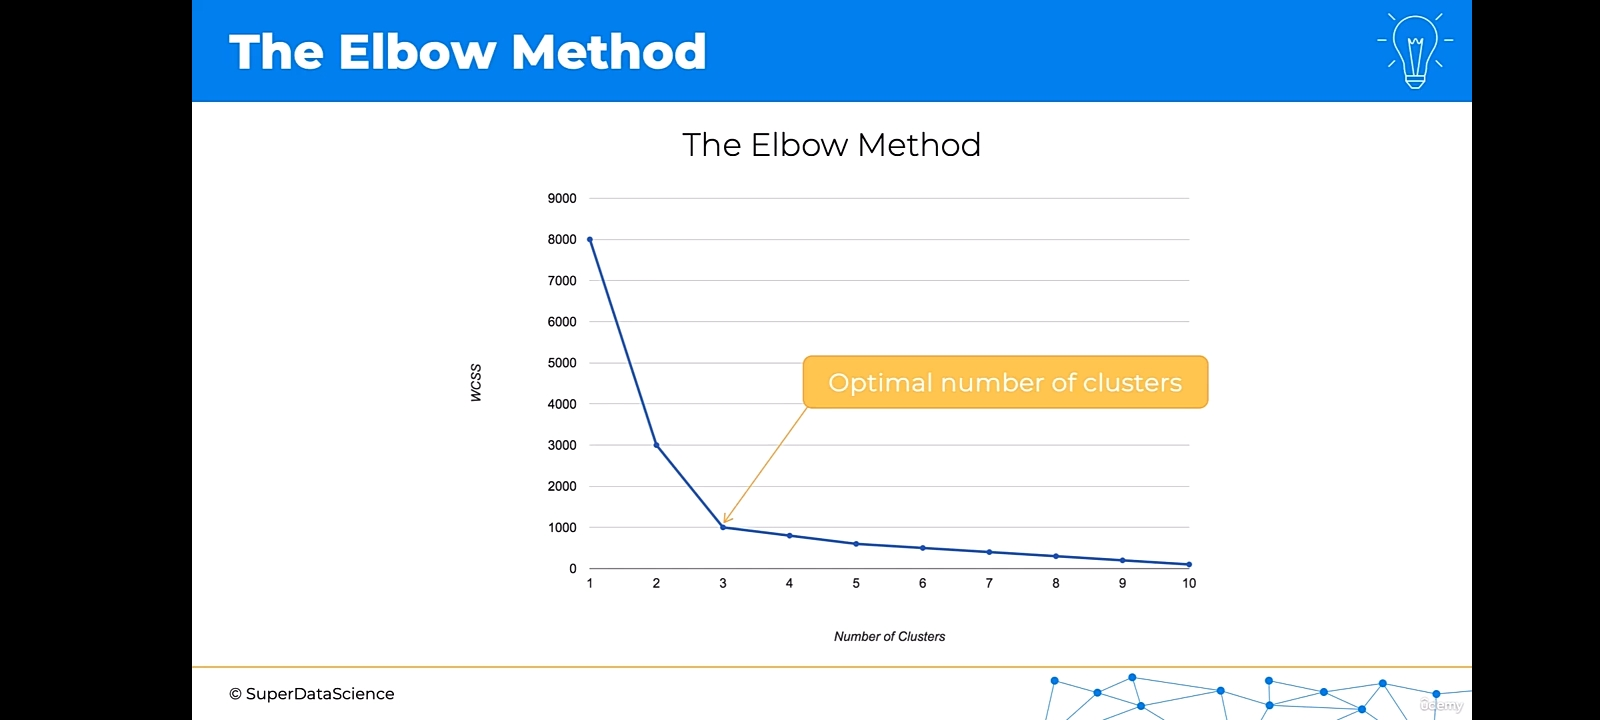

## K-means++

Consider the following, In data points are same in both figures.the centroids are chosen randomly.  
In, first figure, the clusters are formed correctly but in second figure the clusters are incorrect.

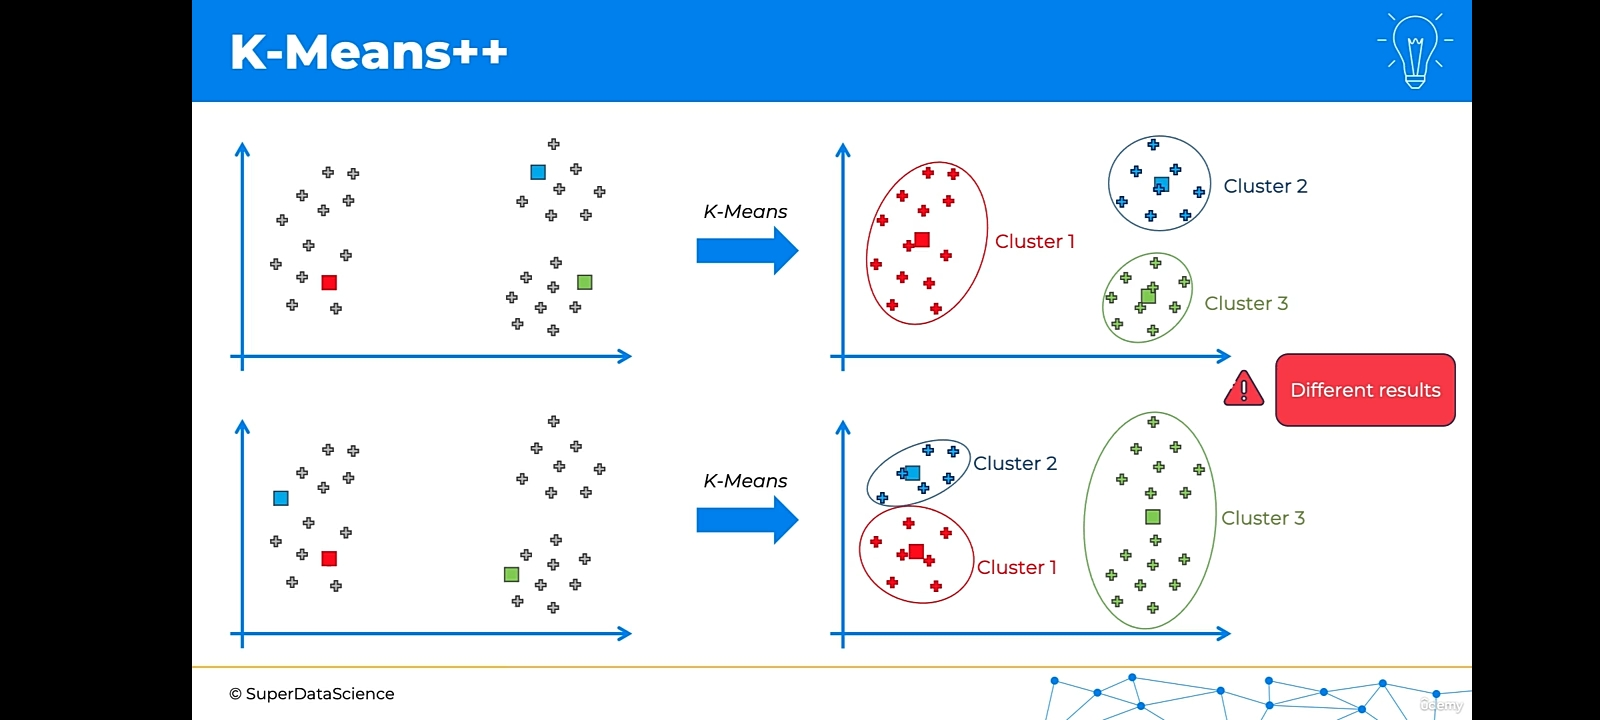

So, this types of problems may be occure in `K-means` and this is known as `Random Initialization Trap`.

So, to solve this type of problems `K-means++` was introduced.  
`K-means++` is same as `K-means`, but it adds some steps at the begining to initialize centroids.  
  


### K-means++ Initialization Algorithm.


`Step-1`: Choose first centroid at random among data points.

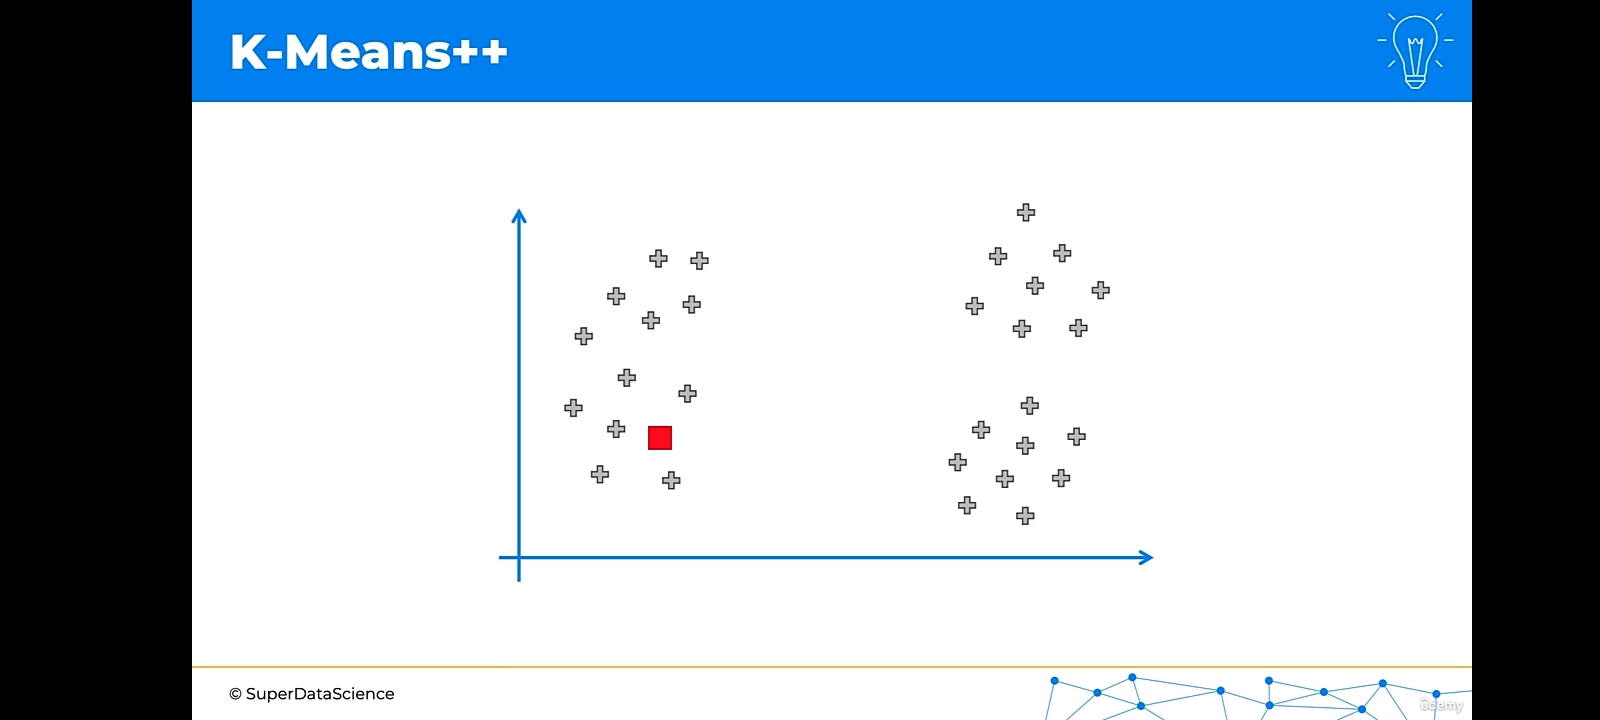

`Step-2`: For each of the remaining data points compute the distance (D) to the nearest out of already selected centroids.

`Step-3`: Choose next centroid among remaining data points using weighted random selection - weighted by $ D^2 $.

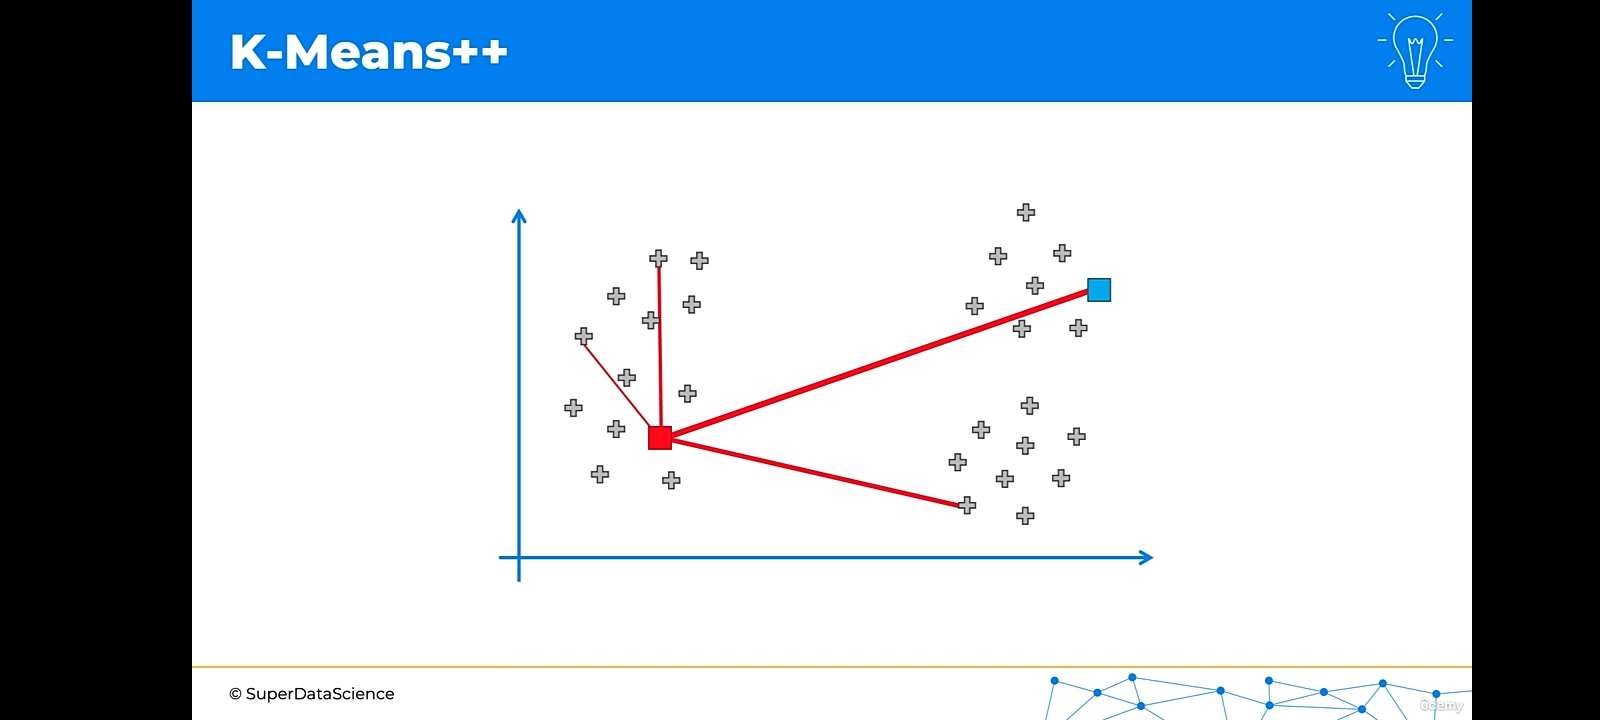

`Step-4`: Repeat Steps 2 and 3 until all centroids have been selected.

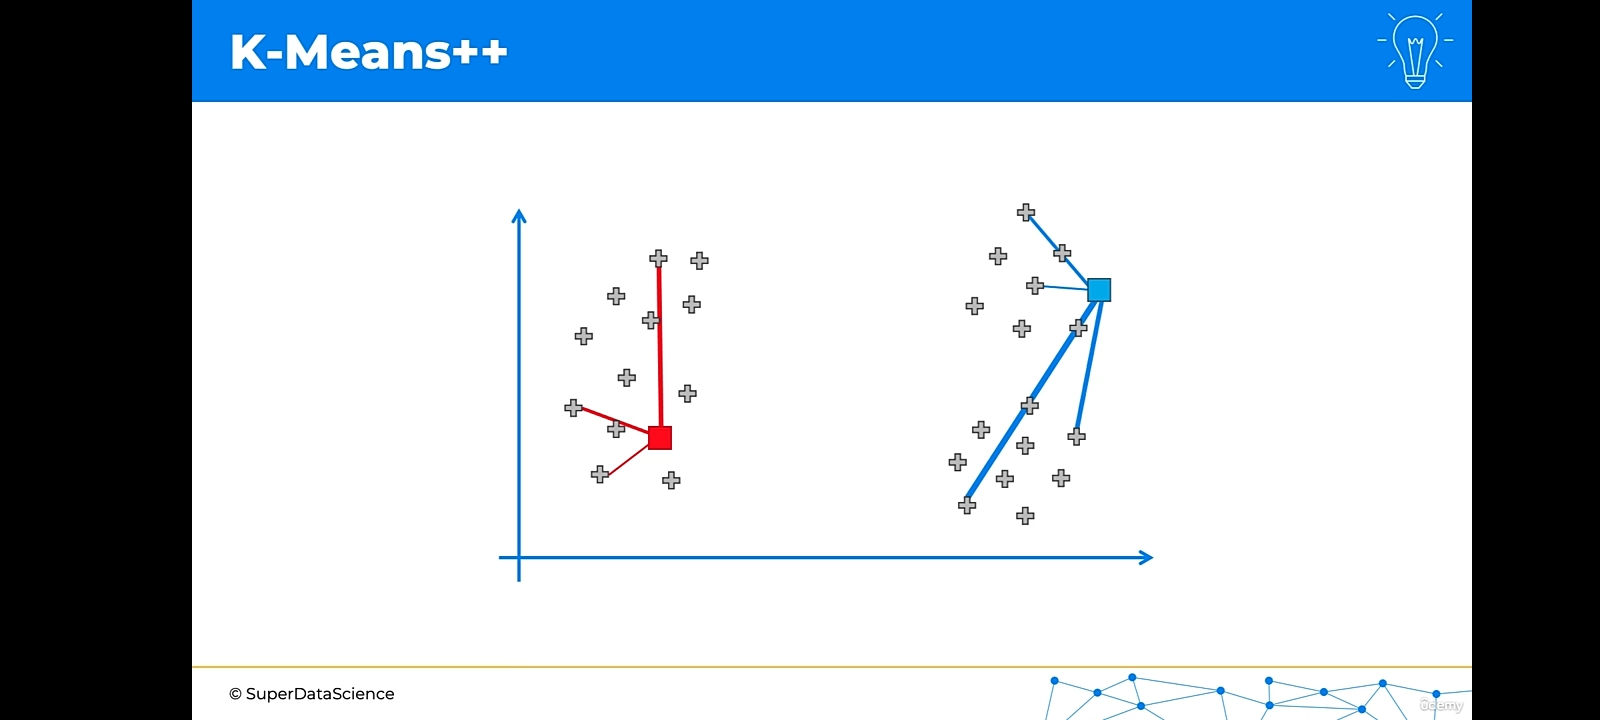

`Step-5`: Proceed with Standard k-means clustering.

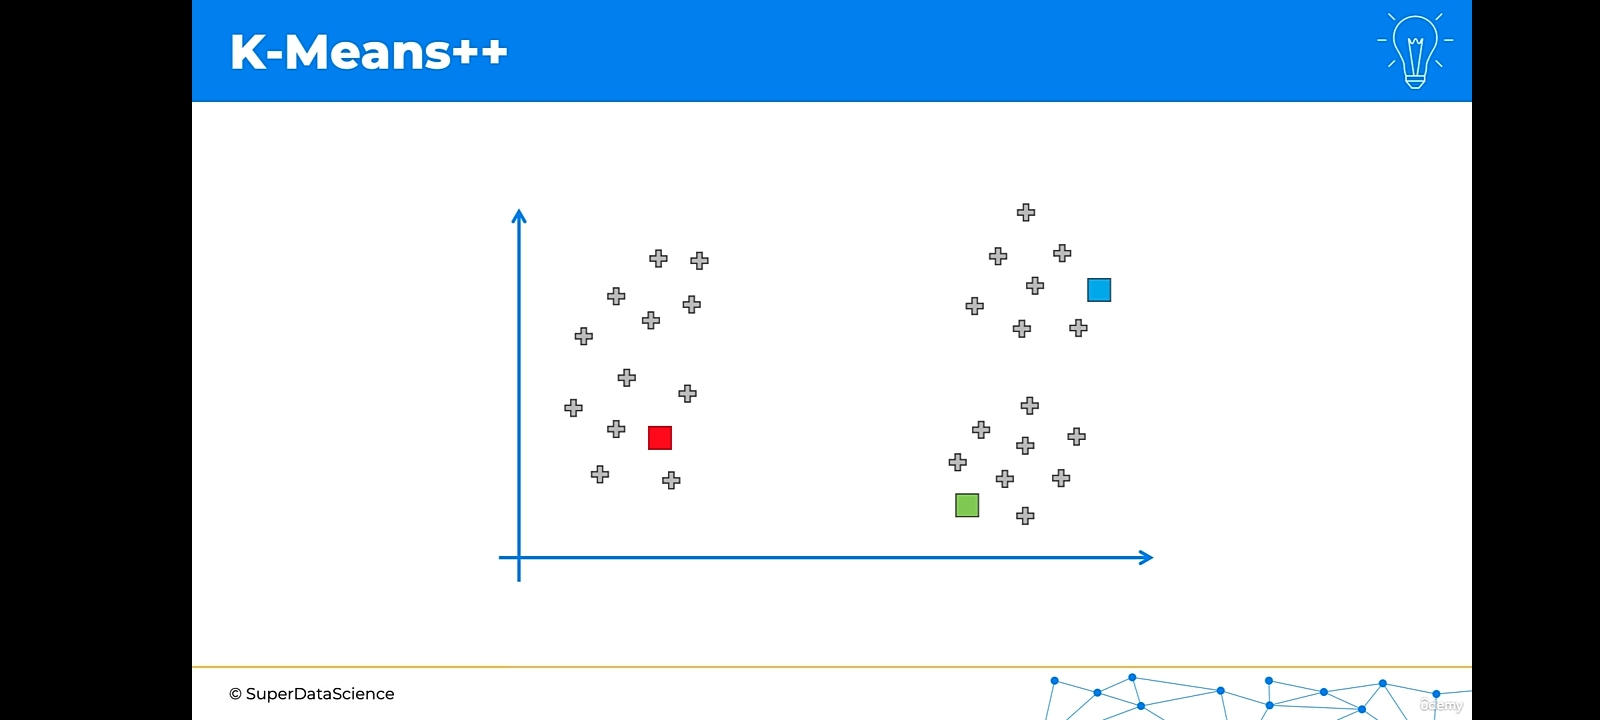

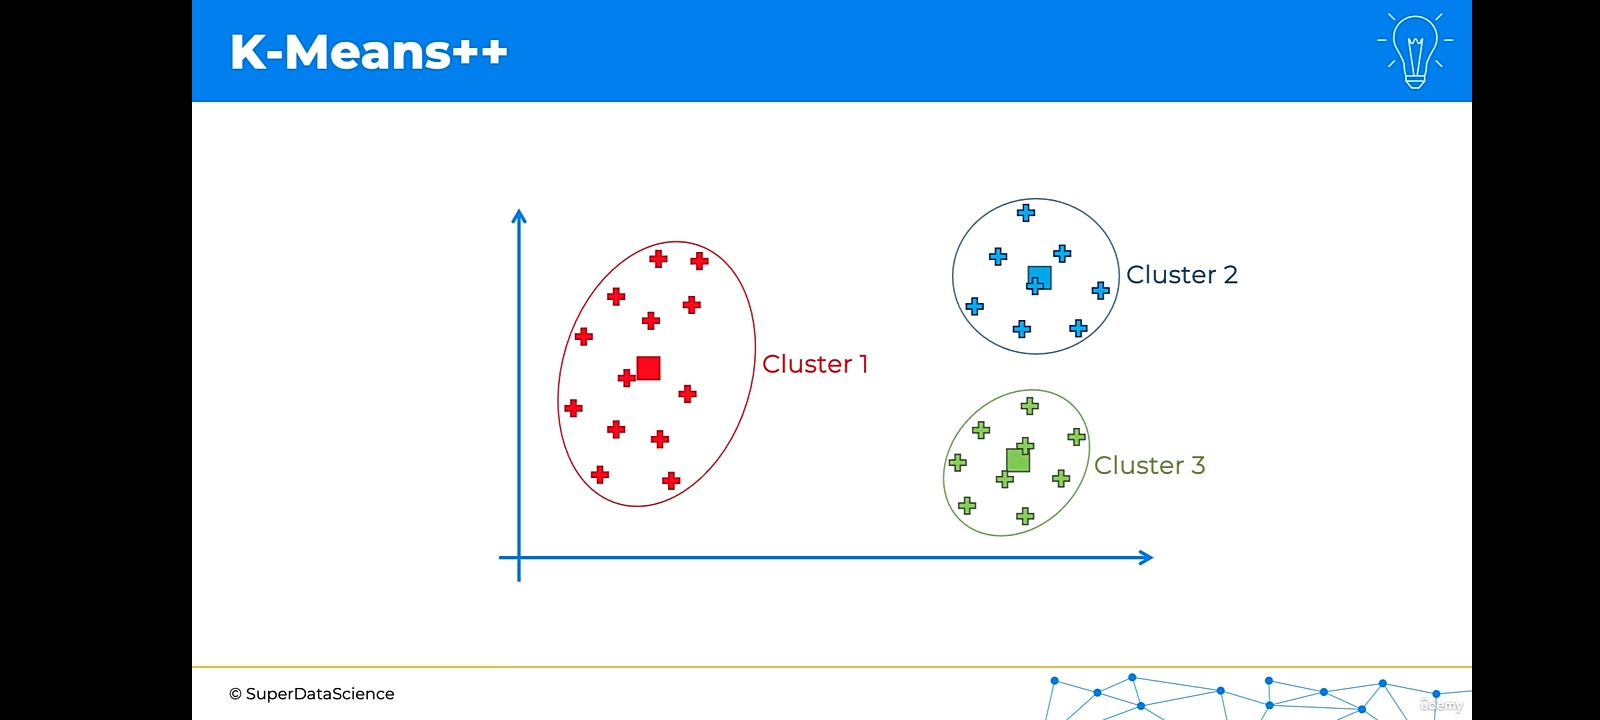

## Implementation

### Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = dataset.iloc[:, [3, 4]].values

### Using the elbow method to find the optimal number of clusters

In [5]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of square
for i in range(1, 11):
  kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_) # "kmeans.inertia_" returns the WCSS value.

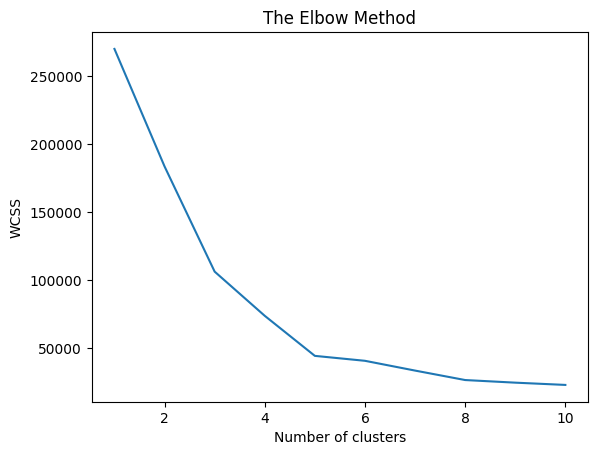

In [6]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Choose the number from where, the graph starts decresing gradually.

### Training the K-means model on the dataset

In [8]:
kmeans = KMeans(n_clusters= 5, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [9]:
# the fit predict method groups all the customers in a particular group according to their features.
print(y_kmeans) # y_kmeans become a dependent variable.

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


### Visualizing the cluster

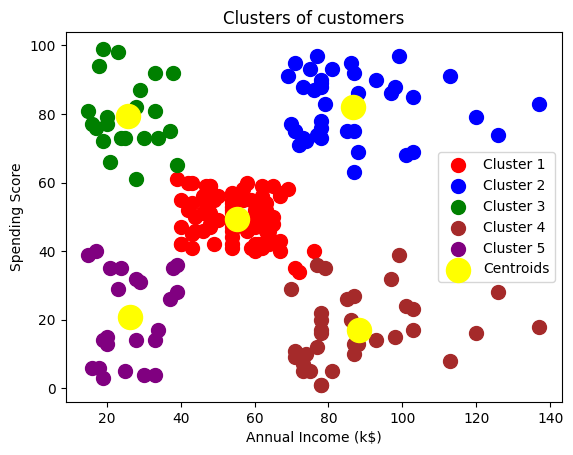

In [13]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c='brown', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c='purple', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()